### The file preamble.py imports all the necessary libraries that we need for our programs

In [1]:
from preamble import *
%matplotlib inline
import pandas as pd

### A First Application: Classifying Iris Species

In this section, we will go through a simple machine learning application and create our first model. In the process, we will introduce some core concepts and terms.

Our goal is to build a machine learning model that can learn from the measurements of these irises whose species is known (setosa, versicolor, or virginica), so that we can predict the species for a new iris.

![sepal_petal](images/iris_petal_sepal.png)

#### Meet the Data

The data we will use for this example is the Iris dataset, a classical dataset in machine learning and statistics. It is included in scikit-learn in the dataset module. We can load it by calling the load_iris function:

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The iris object that is returned by load_iris is a ```Bunch``` object, which is very similar to a dictionary. It contains keys and values:

In [3]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The value of the key ```DESCR``` is a short description of the dataset. We show the beginning of the description here (feel free to look up the rest yourself):

In [4]:
print(iris_dataset['DESCR'][:500] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= =====
...


The value of the key ```target_names``` is an array of strings, containing the species of flower that we want to predict:

In [5]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


The value of ```feature_names``` is a list of strings, giving the description of each feature:

In [6]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the ```target``` and ```data``` fields. data contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a NumPy array:

In [7]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


The rows in the data array correspond to flowers, while the columns represent the four measurements that were taken for each flower:

In [8]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


We see that the array contains measurements for 150 different flowers. Remember that the individual items are called samples in machine learning, and their properties are called features. The shape of the data array is the number of samples times the number of features. This is a convention in scikit-learn, and your data will always be assumed to be in this shape. Here are the feature values for the first five samples:

In [9]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


From this data, we can see that all of the first five flowers have a petal width of 0.2 cm and that the first flower has the longest sepal, at 5.1 cm.

The target array contains the species of each of the flowers that were measured, also as a NumPy array:

In [10]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


```target``` is a one-dimensional array, with one entry per flower:

In [11]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


The species are encoded as integers from 0 to 2:

In [12]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The meanings of the numbers are given by the ```iris['target_names']``` array: 0 means _setosa_, 1 means _versicolor_, and 2 means _virginica_.

#### Measuring Success: Training and Testing Data

We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements. But before we can apply our model to new measurements, we need to know whether it actually works—that is, whether we should trust its predictions.

Unfortunately, we cannot use the data we used to build the model to evaluate it. This is because our model can always simply remember the whole training set, and will therefore always predict the correct label for any point in the training set. This “remembering” does not indicate to us whether our model will generalize well (in other words, whether it will also perform well on new data).

To assess the model’s performance, we show it new data (data that it hasn’t seen before) for which we have labels. This is usually done by splitting the labeled data we have collected (here, our 150 flower measurements) into two parts. One part of the data is used to build our machine learning model, and is called the __training data__ or __training set__. The rest of the data will be used to assess how well the model works; this is called the __test data__, __test set__, or __hold-out set__.

```scikit-learn``` contains a function that shuffles the dataset and splits it for you: the ```train_test_split``` function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set. Deciding how much data you want to put into the training and the test set respectively is somewhat arbitrary, but using a test set containing 25% of the data is a good rule of thumb.

In scikit-learn, data is usually denoted with a capital <b>X</b>, while labels are denoted by a lowercase __y__. This is inspired by the standard formulation _f(x)=y_ in mathematics, where x is the input to a function and y is the output. Following more conventions from mathematics, we use a capital _X because the data is a two-dimensional array (a matrix) and a lowercase y because the target is a one-dimensional array (a vector)_.

Let’s call train_test_split on our data and assign the outputs using this nomenclature:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

Before making the split, the train_test_split function shuffles the dataset using a pseudorandom number generator. If we just took the last 25% of the data as a test set, all the data points would have the label 2, as the data points are sorted by the label (see the output for ```iris['target']``` shown earlier). Using a test set containing only one of the three classes would not tell us much about how well our model generalizes, so we shuffle our data to make sure the test data contains data from all classes.

To make sure that we will get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the ```random_state``` parameter. This will make the outcome deterministic, so this line will always have the same outcome. We will always fix the random_state in this way when using randomized procedures in this book.

The output of the train_test_split function is X_train, X_test, y_train, and y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset, and X_test contains the remaining 25%. Note, 75/25 is the default split for scikit-learn, but we can change that by setting the `test_size` variable to something different, e.g. `test_size=0.3` will assign 30% of the data as the test set.

In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [16]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### First Things First: Look at Your Data

Before building a machine learning model it is often a good idea to inspect the data, to see if the task is easily solvable without machine learning, or if the desired information might not be contained in the data.

Additionally, inspecting your data is a good way to find abnormalities and peculiarities. Maybe some of your irises were measured using inches and not centimeters, for example. In the real world, inconsistencies in the data and unexpected measurements are very common.

One of the best ways to inspect data is to visualize it. One way to do this is by using a _scatter plot_. A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point. Unfortunately, computer screens have only two dimensions, which allows us to plot only two (or maybe three) features at a time. It is difficult to plot datasets with more than three features this way. One way around this problem is to do a __pair plot__, which looks at all possible pairs of features. If you have a small number of features, such as the four we have here, this is quite reasonable. You should keep in mind, however, that a pair plot does not show the interaction of all of features at once, so some interesting aspects of the data may not be revealed when visualizing it this way.

The figure generated when running the code below is a pair plot of the features in the training set. The data points are colored according to the species the iris belongs to. To create the plot, we first convert the NumPy array into a ```pandas DataFrame```. pandas has a function to create pair plots called ```scatter_matrix```. The diagonal of this matrix is filled with histograms of each feature:

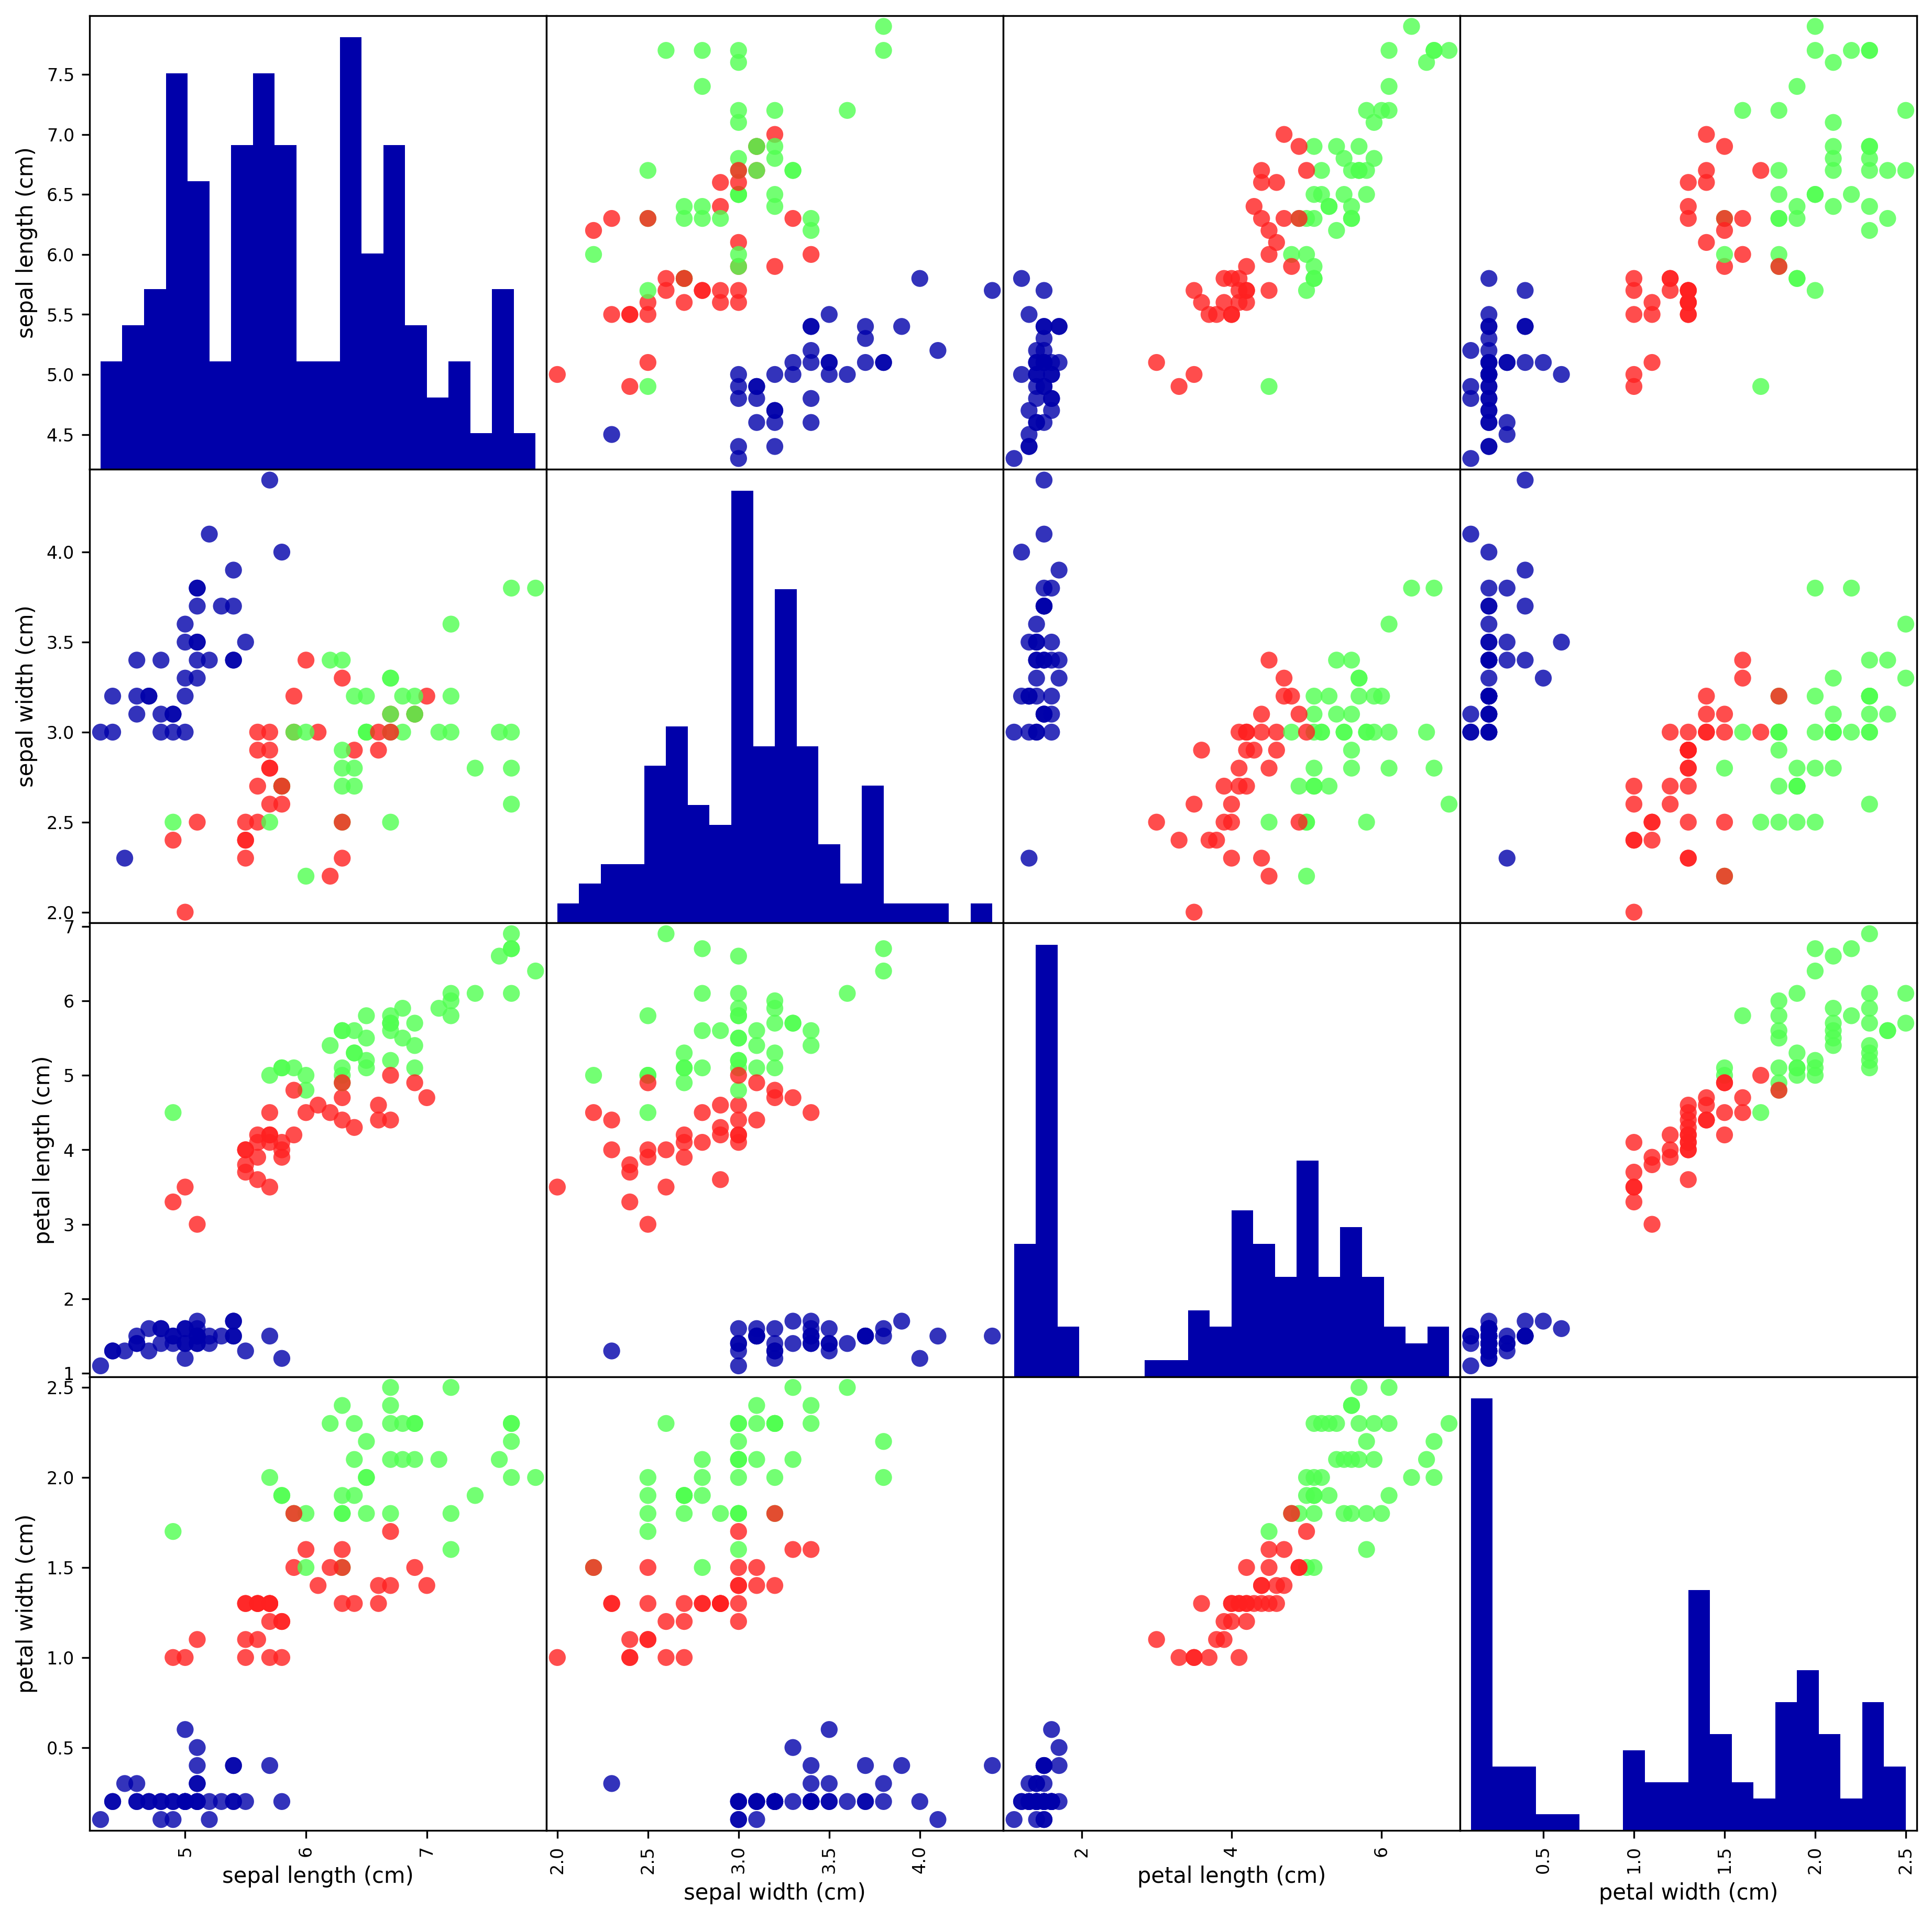

In [17]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3);
plt.show()

From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. This means that a machine learning model will likely be able to learn to separate them.

#### Building Your First Model: k-Nearest Neighbors

Now we can start building the actual machine learning model. There are many classification algorithms in scikit-learn that we could use. Here we will use a k-nearest neighbors classifier, which is easy to understand. Building this model only consists of storing the training set. To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.

The _k_ in k-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (for example, the closest three or five neighbors). Then, we can make a prediction using the majority class among these neighbors. For now we will use only a single neighbor.

All machine learning models in scikit-learn are implemented in their own classes, which are called Estimator classes. The k-nearest neighbors classification algorithm is implemented in the ```KNeighborsClassifier``` class in the neighbors module. Before we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The most important parameter of KNeighborsClassifier is the number of neighbors, which we will set to 1:

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The ```knn``` object encapsulates the algorithm that will be used to build the model from the training data, as well the algorithm to make predictions on new data points. It will also hold the information that the algorithm has extracted from the training data. In the case of KNeighborsClassifier, it will just store thetraining set.

To build the model on the training set, we call the ```fit``` method of the ```knn``` object, which takes as arguments the NumPy array ```X_train``` containing the training data and the NumPy array ```y_train``` of the corresponding training labels:

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

The ```fit``` method returns the ```knn``` object itself (and modifies it in place), so we get a string representation of our classifier. The representation shows us which parameters were used in creating the model. Nearly all of them are the default values, but you can also find ```n_neighbors=1```, which is the parameter that we passed. 

Most models in scikit-learn have many parameters, but the majority of them are either speed optimizations or for very special use cases. You don’t have to worry about the other parameters shown in this representation. Printing a scikit-learn model can yield very long strings, but don’t be intimidated by these. We will cover all the important parameters in future chapters.

#### Making Predictions

We can now make predictions using this model on new data for which we might not know the correct labels. Imagine we found an iris in the wild with a sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm. What species of iris would this be? We can put this data into a NumPy array, again by calculating the shape—that is, the number of samples (1) multiplied by the number of features (4):

In [23]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


Note that we made the measurements of this single flower into a row in a two-dimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data.

To make a prediction, we call the `predict` method of the knn object:

In [24]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that this new iris belongs to the class 0, meaning its species is setosa. 

But how do we know whether we can trust our model? We don’t know the correct species of this sample, which is the whole point of building the model!

#### Evaluating the Model

This is where the test set that we created earlier comes in. This data was not used to build the model, but we do know what the correct species is for each iris in the test set.

Therefore, we can make a prediction for each iris in the test data and compare it against its label (the known species). We can measure how well the model works by computing the __accuracy__, which is the fraction of flowers for which the right species was predicted:

In [25]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


The test score is calculated as the number of correct preditions over the total number of predictions.

In [26]:
print("Test set score: {:.2f}".format(np.sum(y_pred == y_test)/np.size(y_pred)))

Test set score: 0.97


We can also use the score method of the knn object, which will compute the test set accuracy for us:

In [27]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises. For our hobby botanist application, this high level of accuracy means that our model may be trustworthy enough to use. In later chapters we will discuss how we can improve performance, and what caveats there are in tuning
a model.

### Summary and Outlook

Let’s summarize what we learned in this chapter. We formulated the task of predicting which species of iris a particular flower belongs to by using physical measurements of the flower. We used a *dataset* of measurements that was annotated by an expert with the correct species to build our *model*, making this a _supervised learning_ task. There were three possible species, *setosa, versicolor, or virginica*, which made the task a three-class classification problem. The possible species are called _classes_ in the classification problem, and the species of a single iris is called its _label_.

The Iris dataset consists of two NumPy arrays: one containing the data, which is referred to as *X* in scikit-learn, and one containing the correct or desired outputs, which is called *y*. The array X is a two-dimensional array of *features*, with one row per data point and one column per feature. The array y is a onedimensional array, which here contains one class label, an integer ranging from 0 to 2, for each of the samples.

We split our dataset into a *training set*, to build our model, and a *test set*, to evaluate how well our model will generalize to new, previously unseen data.

We chose the *k-nearest neighbors* classification algorithm, which makes predictions for a new data point by considering its closest neighbor(s) in the training set. This is implemented in the `KNeighborsClassifier` class, which contains the algorithm that builds the model as well as the algorithm that makes a prediction using the model. We instantiated the class, setting parameters. Then we built the model by calling the fit method, passing the training data (`X_train`) and training outputs (`y_train`) as parameters. We evaluated the model using the score method, which computes the accuracy of the model. We applied the `score` method to the test set data and the test set labels and found that our model is about 97% accurate, meaning it is correct 97% of the time on the test set.

This gave us the confidence to apply the model to new data (in our example, new flower measurements) and trust that the model will be correct about 97% of the time.

Here is a summary of the code needed for the whole training and evaluation procedure:

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


This snippet contains the core code for applying any machine learning algorithm using _scikit-learn_. The `fit`, `predict`, and `score` methods are the common interface to supervised models in scikit-learn, and with the concepts introduced in this chapter, you can apply these models to many machine learning tasks.
